In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats.stats import kendalltau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LSTM, Masking
from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import activations
sns.set()

In [ ]:
# #permutation feature importance values
# gbc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi.csv')
# ada_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi.csv')
# rfc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi.csv')
# nb_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi.csv')
# nnmlp_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi.csv')
# svc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi.csv')
# lstm_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi.csv')
# cnn_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi.csv')

# gbc_pfi = gbc_pfi.weight.values
# ada_pfi = ada_pfi.weight.values
# rfc_pfi = rfc_pfi.weight.values
# nb_pfi = nb_pfi.weight.values
# nnmlp_pfi = nnmlp_pfi.weight.values
# svc_pfi = svc_pfi.weight.values
# lstm_pfi = lstm_pfi.weight.values
# cnn_pfi = cnn_pfi.weight.values

# gbc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi_corr.csv')
# ada_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi_corr.csv')
# rfc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi_corr.csv')
# nb_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi_corr.csv')
# nnmlp_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi_corr.csv')
# svc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi_corr.csv')
# lstm_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi_corr.csv')
# cnn_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi_corr.csv')

# gbc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi_mis.csv')
# ada_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi_mis.csv')
# rfc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi_mis.csv')
# nb_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi_mis.csv')
# nnmlp_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi_mis.csv')
# svc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi_mis.csv')
# lstm_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi_mis.csv')
# cnn_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi_mis.csv')

# gbc_pfi_corr = gbc_pfi_corr.weight.values
# ada_pfi_corr = ada_pfi_corr.weight.values
# rfc_pfi_corr = rfc_pfi_corr.weight.values
# nb_pfi_corr = nb_pfi_corr.weight.values
# nnmlp_pfi_corr = nnmlp_pfi_corr.weight.values
# svc_pfi_corr = svc_pfi_corr.weight.values
# lstm_pfi_corr = lstm_pfi_corr.weight.values
# cnn_pfi_corr = cnn_pfi_corr.weight.values

# gbc_pfi_mis = gbc_pfi_mis.weight.values
# ada_pfi_mis = ada_pfi_mis.weight.values
# rfc_pfi_mis = rfc_pfi_mis.weight.values
# nb_pfi_mis = nb_pfi_mis.weight.values
# nnmlp_pfi_mis = nnmlp_pfi_mis.weight.values
# svc_pfi_mis = svc_pfi_mis.weight.values
# lstm_pfi_mis = lstm_pfi_mis.weight.values
# cnn_pfi_mis = cnn_pfi_mis.weight.values

In [ ]:
#permutation feature importance values
gbc_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/gbc_pfi.csv')
ada_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/ada_pfi.csv')
rfc_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/rfc_pfi.csv')
nb_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/nb_pfi.csv')
nnmlp_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/nnmlp_pfi.csv')
svc_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/svc_pfi.csv')
lstm_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/lstm_pfi.csv')
cnn_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/cnn_pfi.csv')

gbc_pfi = gbc_pfi.weight.values
ada_pfi = ada_pfi.weight.values
rfc_pfi = rfc_pfi.weight.values
nb_pfi = nb_pfi.weight.values
nnmlp_pfi = nnmlp_pfi.weight.values
svc_pfi = svc_pfi.weight.values
lstm_pfi = lstm_pfi.weight.values
cnn_pfi = cnn_pfi.weight.values

gbc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/gbc_pfi_corr.csv')
ada_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/ada_pfi_corr.csv')
rfc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/rfc_pfi_corr.csv')
nb_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/nb_pfi_corr.csv')
nnmlp_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/nnmlp_pfi_corr.csv')
svc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/svc_pfi_corr.csv')
lstm_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/lstm_pfi_corr.csv')
cnn_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/cnn_pfi_corr.csv')

gbc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/gbc_pfi_mis.csv')
ada_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/ada_pfi_mis.csv')
rfc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/rfc_pfi_mis.csv')
nb_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/nb_pfi_mis.csv')
nnmlp_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/nnmlp_pfi_mis.csv')
svc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/svc_pfi_mis.csv')
lstm_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/lstm_pfi_mis.csv')
cnn_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/cnn_pfi_mis.csv')

gbc_pfi_corr = gbc_pfi_corr.weight.values
ada_pfi_corr = ada_pfi_corr.weight.values
rfc_pfi_corr = rfc_pfi_corr.weight.values
nb_pfi_corr = nb_pfi_corr.weight.values
nnmlp_pfi_corr = nnmlp_pfi_corr.weight.values
svc_pfi_corr = svc_pfi_corr.weight.values
lstm_pfi_corr = lstm_pfi_corr.weight.values
cnn_pfi_corr = cnn_pfi_corr.weight.values

gbc_pfi_mis = gbc_pfi_mis.weight.values
ada_pfi_mis = ada_pfi_mis.weight.values
rfc_pfi_mis = rfc_pfi_mis.weight.values
nb_pfi_mis = nb_pfi_mis.weight.values
nnmlp_pfi_mis = nnmlp_pfi_mis.weight.values
svc_pfi_mis = svc_pfi_mis.weight.values
lstm_pfi_mis = lstm_pfi_mis.weight.values
cnn_pfi_mis = cnn_pfi_mis.weight.values

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *


# use this for holdout 25/75 >>>>>>>>>>>>>>>.
train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

# # use this for leave patients >>>>>>>>>>>>>>>.

# train_values = np.empty(shape=[0, 222])
# test_values = np.empty(shape=[0, 222])

# train_patients = glob.glob('./drive/MyDrive/compsci/train_patients.csv')
# test_patients = glob.glob('./drive/MyDrive/compsci/test_patients.csv')

# for j in train_patients:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     train_values = np.append(train_values, csvrows, axis=0)

# for j in test_patients:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)
    
# print(train_values.shape)
# print(test_values.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


In [ ]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]
y_train = train_values[:,-2]
y_test = test_values[:,-2]
y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)
X_train1 = X_train.reshape(X_train.shape + (1,1))
X_test1 = X_test.reshape(X_test.shape + (1,1))
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 256
activationFunction='relu'

def getlstmModel():
    
    lstmmodel = Sequential()
    lstmmodel.add(LSTM(128, return_sequences=True, input_shape=(X_train1.shape[1],1)))
    lstmmodel.add(LSTM(9, return_sequences=True))
    lstmmodel.add(MaxPooling1D(pool_size=2))
    lstmmodel.add(Flatten())
    lstmmodel.add(Dense(512, activation=tf.nn.relu))    
    lstmmodel.add(Dense(128, activation=tf.nn.relu))    
    lstmmodel.add(Dense(32, activation=tf.nn.relu))
    lstmmodel.add(Dense(9, activation='softmax'))
    lstmmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    lstmmodel.summary()
    return lstmmodel

lstmmodel = getlstmModel()

lstmmodelhistory= lstmmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 220, 128)          66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 220, 9)            4968      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 990)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               507392    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


165049/165049 [==============================] - 223s 1ms/sample - loss: 0.1935 - accuracy: 0.9387 - val_loss: 0.0719 - val_accuracy: 0.9755
Epoch 2/5
165049/165049 [==============================] - 225s 1ms/sample - loss: 0.0567 - accuracy: 0.9811 - val_loss: 0.0451 - val_accuracy: 0.9845
Epoch 3/5
165049/165049 [==============================] - 224s 1ms/sample - loss: 0.0371 - accuracy: 0.9876 - val_loss: 0.0370 - val_accuracy: 0.9873
Epoch 4/5
165049/165049 [==============================] - 224s 1ms/sample - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0310 - val_accuracy: 0.9905
Epoch 5/5
165049/165049 [==============================] - 223s 1ms/sample - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0288 - val_accuracy: 0.9905


In [ ]:
get_last_conv1 = keras.backend.function([lstmmodel.layers[0].input, keras.backend.learning_phase()], [lstmmodel.layers[1].output])
last_conv1_lstm = get_last_conv1([X_test1[:,:,:,0]])[0]

get_softmax1_lstm = keras.backend.function([lstmmodel.layers[0].input, keras.backend.learning_phase()], [lstmmodel.layers[-1].output])
softmax1_lstm = get_softmax1_lstm(([X_test1[:,:,:,0]]))[0]
softmax_weight1_lstm = lstmmodel.get_weights()[-1]
softmax_weight_lstm = np.reshape(softmax_weight1_lstm,(9,1))

In [ ]:
from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return
a = last_conv1_lstm
new_last_lstm = []
for i in range(len(last_conv1_lstm)):
  means = list(means_of_slices(a[i], 20))
  new_last_lstm.append(means)
new_last_lstm = np.array(new_last_lstm)
print(new_last_lstm.shape)

final_last_lstm = []
for i in new_last_lstm:
  final_last_lstm.append(np.repeat(i,20))
final_last_lstm = np.array(final_last_lstm)
print(final_last_lstm.shape)

(14380, 11)
(14380, 220)


In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 64
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=16,padding='same', activation='relu',input_shape=(X_train1.shape[1],1)))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=32, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=9, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2,padding='same'))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(512, activation='relu'))
    cnnmodel.add(Dense(128, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()
modelhistory= cnnmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 220, 128)          2176      
_________________________________________________________________
batch_normalization_2 (Batch (None, 220, 128)          512       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 220, 32)           65568     
_________________________________________________________________
batch_normalization_3 (Batch (None, 220, 32)           128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 220, 9)            4617      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 990)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


165049/165049 [==============================] - 23s 139us/sample - loss: 0.1287 - accuracy: 0.9574 - val_loss: 0.0623 - val_accuracy: 0.9779
Epoch 2/5
165049/165049 [==============================] - 22s 135us/sample - loss: 0.0485 - accuracy: 0.9837 - val_loss: 0.0460 - val_accuracy: 0.9841
Epoch 3/5
165049/165049 [==============================] - 22s 134us/sample - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0332 - val_accuracy: 0.9882
Epoch 4/5
165049/165049 [==============================] - 22s 135us/sample - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0360 - val_accuracy: 0.9877
Epoch 5/5
165049/165049 [==============================] - 22s 135us/sample - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.0370 - val_accuracy: 0.9909


In [ ]:
get_last_conv1 = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[4].output])
last_conv1_cnn = get_last_conv1([X_test1[:,:,:,0]])[0]

get_softmax1_cnn = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[-1].output])
softmax1_cnn = get_softmax1_cnn(([X_test1[:,:,:,0]]))[0]
softmax_weight1_cnn = cnnmodel.get_weights()[-1]
softmax_weight_cnn = np.reshape(softmax_weight1_cnn,(9,1))

In [ ]:
from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return
a = last_conv1_cnn
new_last_conv1 = []

for i in range(len(last_conv1_cnn)):
  means = list(means_of_slices(a[i], 20))
  new_last_conv1.append(means)
new_last_conv1 = np.array(new_last_conv1)
print(new_last_conv1.shape)

final_last_conv1 = []
for i in new_last_conv1:
  final_last_conv1.append(np.repeat(i,20))
final_last_conv1 = np.array(final_last_conv1)
print(final_last_conv1.shape)

(14380, 11)
(14380, 220)


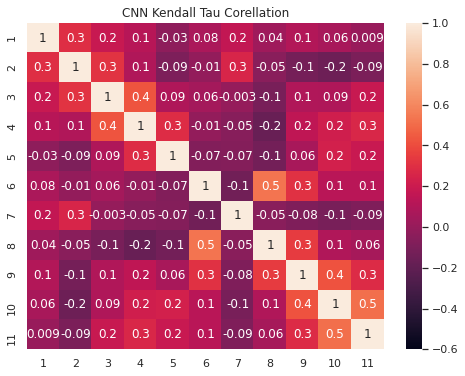

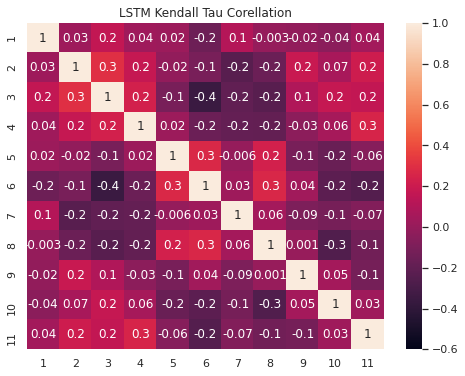

In [ ]:
df_cnn = pd.DataFrame(new_last_conv1)
corr_cnn = df_cnn.corr(method='kendall')
slices_nums = [1,2,3,4,5,6,7,8,9,10,11]
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_cnn,annot=True,xticklabels=slices_nums,yticklabels=slices_nums,vmin=-0.6,vmax=1,fmt='0.1g')
plt.title('CNN Kendall Tau Corellation')
plt.show()

df_lstm = pd.DataFrame(new_last_lstm)
corr_lstm = df_lstm.corr(method='kendall')
slices_nums = [1,2,3,4,5,6,7,8,9,10,11]
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_lstm,annot=True,xticklabels=slices_nums,yticklabels=slices_nums,vmin=-0.6,vmax=1,fmt='0.1g')
plt.title('LSTM Kendall Tau Corellation')
plt.show()

In [ ]:
from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return

a = X_train[:,:]
print(a.shape)
b = []

for i in range(90):
  means = list(means_of_slices(a[i], 20))
  b.append(means)
b = np.array(b)
print(b.shape)

c = []
for i in b:
  c.append(np.repeat(i,20))
c = np.array(c)
print(c.shape)

(206312, 220)
(90, 11)
(90, 220)


0    -0.092136
1     0.068931
2    -0.077819
3    -0.094364
4    -0.022889
5     0.226087
6    -0.079842
7    -0.066148
8    -0.008495
9    -0.078700
10   -0.209264
dtype: float64


Text(0.5, 1.0, 'Kendall Tau Correlation Between CNN and LSTM Segments')

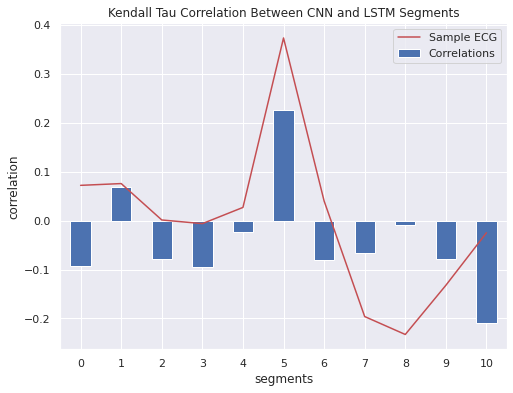

In [ ]:
# df_cnn_std = (df_cnn-df_cnn.mean())/df_cnn.std()
# df_lstm_std = (df_lstm-df_lstm.mean())/df_lstm.std()
rcParams['figure.figsize'] = 8,6

corrwith = df_cnn.corrwith(df_lstm, method='kendall')
print(corrwith)

corrwith.plot(kind='bar',rot=0, label = 'Correlations')
plt.plot(b[50]/6, color='r',label = 'Sample ECG')

plt.legend()

plt.xlabel('segments')
plt.ylabel('correlation')
plt.title('Kendall Tau Correlation Between CNN and LSTM Segments')

In [ ]:
models = [gbc_pfi,ada_pfi,rfc_pfi,nb_pfi,nnmlp_pfi,svc_pfi,cnn_pfi,lstm_pfi]
models = pd.DataFrame(models)
models = models.transpose()
models.columns = ['GBC','ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
models

,GBC,ADA,RFC,NB,NNMLP,SVC,CNN,LSTM
0,0.019193,-0.013491,0.028039,0.012211,0.139332,0.190042,0.011669,0.024465
1,0.032587,-0.021905,0.026648,0.032559,0.101321,0.131029,0.020181,0.009903
2,-0.004214,-0.010181,0.013352,-0.012309,0.112197,0.075160,0.013978,0.021168
3,0.011196,0.002517,0.012184,-0.009652,0.052851,0.042907,0.136106,0.027928
4,0.095869,0.027663,0.038832,0.089680,0.127163,0.092309,0.036189,0.059750
5,0.115271,0.010292,0.196356,-0.007580,0.237038,0.232142,0.029499,0.010250
6,0.088387,-0.025841,0.089138,0.005063,0.220918,0.198248,0.050250,0.146412
7,0.314089,0.028999,0.379332,0.113241,0.450987,0.404743,0.183950,0.195925
8,0.009318,-0.024673,0.028498,-0.060348,0.211182,0.155452,0.148790,0.123588
9,0.050612,-0.007691,0.011127,-0.005382,0.214687,0.171460,0.072643,0.106787


In [ ]:
models_corr = [gbc_pfi_corr,ada_pfi_corr,rfc_pfi_corr,nb_pfi_corr,nnmlp_pfi_corr,svc_pfi_corr,cnn_pfi_corr,lstm_pfi_corr]
models_corr = pd.DataFrame(models_corr)
models_corr = models_corr.transpose()
models_corr.columns = ['GBC','ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
models_corr

,GBC,ADA,RFC,NB,NNMLP,SVC,CNN,LSTM
0,0.041538,0.039293,0.041577,0.062487,0.169669,0.224579,0.011293,0.023968
1,0.056763,0.037384,0.043275,0.105296,0.129559,0.163132,0.019385,0.009630
2,0.023860,0.028066,0.033629,0.018210,0.140540,0.105875,0.014042,0.020735
3,0.038455,0.167275,0.032780,0.029177,0.079745,0.064232,0.136543,0.028521
4,0.124740,0.338591,0.079250,0.215647,0.146461,0.109498,0.037022,0.060431
5,0.165414,0.176593,0.230867,0.077417,0.264090,0.264965,0.030100,0.011417
6,0.125480,0.189896,0.113604,0.071541,0.250467,0.227064,0.050063,0.144944
7,0.394023,0.323435,0.446825,0.390536,0.493975,0.459531,0.185662,0.197305
8,0.052941,0.125007,0.080654,0.062761,0.245986,0.198728,0.149669,0.121245
9,0.071296,0.232501,0.037765,0.079228,0.247930,0.207095,0.072297,0.108949


In [ ]:
models_mis = [gbc_pfi_mis,ada_pfi_mis,rfc_pfi_mis,nb_pfi_mis,nnmlp_pfi_mis,svc_pfi_mis,cnn_pfi_mis,lstm_pfi_mis]
models_mis = pd.DataFrame(models_mis)
models_mis = models_mis.transpose()
models_mis.columns = ['GBC','ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
models_mis

,GBC,ADA,RFC,NB,NNMLP,SVC,CNN,LSTM
0,-0.094471,-0.029010,-0.076425,-0.023551,-0.313304,-0.268106,0.059794,0.008633
1,-0.185938,-0.056818,-0.119916,-0.023505,-0.325277,-0.286752,0.018557,0.002878
2,-0.185817,-0.025552,-0.165376,-0.038846,-0.327051,-0.267713,0.043299,-0.010072
3,-0.134375,-0.053416,-0.202393,-0.041544,-0.367627,-0.219038,0.067010,0.008633
4,-0.091827,-0.070593,-0.191274,-0.017007,-0.233038,-0.141708,0.036082,-0.027338
5,-0.206250,-0.059406,-0.153554,-0.073422,-0.143016,-0.208440,-0.010309,-0.018705
6,-0.135697,-0.111842,-0.095285,-0.056979,-0.204878,-0.114818,0.030928,0.045324
7,-0.120433,-0.072978,-0.077833,-0.068004,-0.246785,-0.147596,0.107216,0.082734
8,-0.210216,-0.079005,-0.299226,-0.139761,-0.271840,-0.302257,0.090722,0.131655
9,-0.157091,-0.073680,-0.216890,-0.081023,-0.363415,-0.287537,-0.004124,0.046043


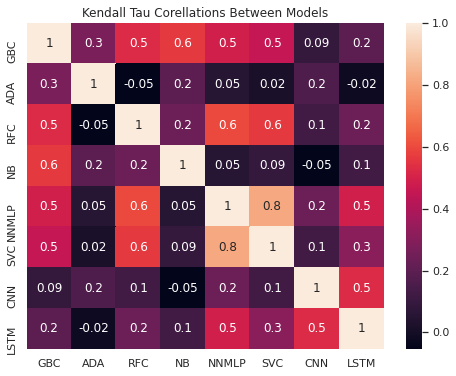

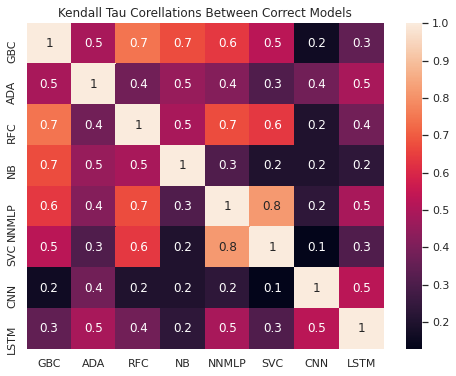

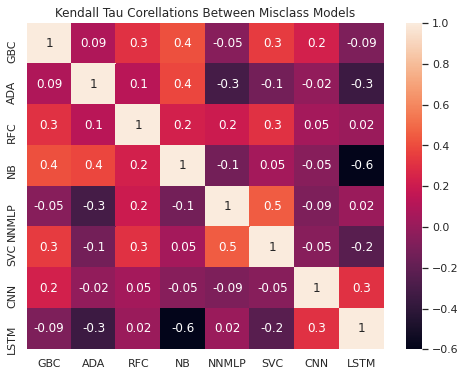

In [ ]:
corr = models.corr(method='kendall')
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr,annot=True,fmt='0.1g')
plt.title('Kendall Tau Corellations Between Models')
plt.show()

corr_corr = models_corr.corr(method='kendall')
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_corr,annot=True,fmt='0.1g')
plt.title('Kendall Tau Corellations Between Correct Models')
plt.show()

corr_mis = models_mis.corr(method='kendall')
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_mis,annot=True,fmt='0.1g')
plt.title('Kendall Tau Corellations Between Misclass Models')
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarni

Accuracy  : 0.9743393602225313
Precision : 0.980195629417252
Recall : 0.9743393602225313
f1score : 0.9763904503555061
[[9242    0   13   53   27   70   80    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0  620    1    6    0    0]
 [   0    0    0    0    0    0    0    0]
 [   2    0    0    0    0  407    0    0]
 [   0    0    0    0    0    0 1143    0]
 [   2    0    0    3    0    0  112 2599]]
              precision    recall  f1-score   support

           1      1.000     0.974     0.987      9485
           3      0.000     0.000     0.000         0
           4      0.917     0.989     0.952       627
           5      0.000     0.000     0.000         0
           6      0.843     0.995     0.913       409
           7      0.856     1.000     0.923      1143
           8      1.000     0.957     0.978      2716

    accuracy                          0.974     14380
   macro avg      0.659     0.702     0.679     1

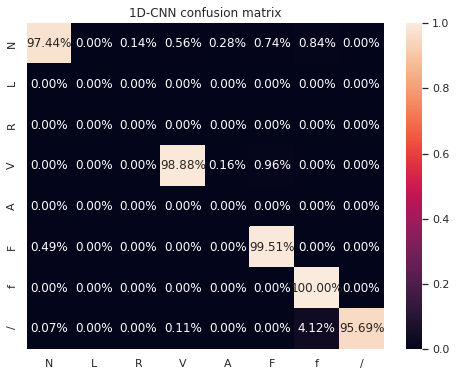

Accuracy  : 0.9846314325452017
Precision : 0.9909760742637963
Recall : 0.9846314325452017
f1score : 0.9876263147531054
[[9300    0    6   31   75   38   35    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   2    0    0  620    2    3    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  409    0    0]
 [   0    0    0    0    0    0 1137    6]
 [   0    0    0    0    1    0   22 2693]]
              precision    recall  f1-score   support

           1      1.000     0.980     0.990      9485
           3      0.000     0.000     0.000         0
           4      0.952     0.989     0.970       627
           5      0.000     0.000     0.000         0
           6      0.909     1.000     0.952       409
           7      0.952     0.995     0.973      1143
           8      0.998     0.992     0.995      2716

    accuracy                          0.985     14380
   macro avg      0.687     0.708     0.697     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


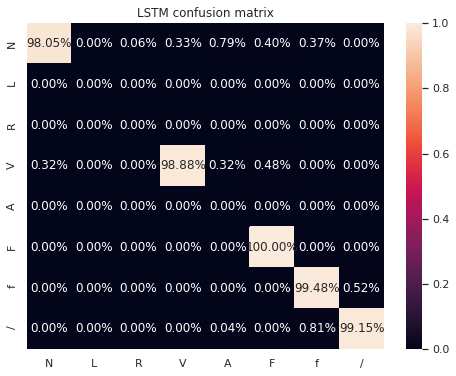

In [ ]:
from sklearn.metrics import *
def showResults(test, pred, model_name):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision= precision_score(test, pred, average='weighted')
    recall = recall_score(test, pred, average = 'weighted')
    f1score= f1_score(test, pred, average='weighted') 
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1score : {}".format(f1score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred,labels=[1,2,3,4,5,6,7,8])
    cm = np.nan_to_num(cm)
    print(cm)
    return (model_name, round(accuracy,3), round(precision,3) , round(recall,3) , round(f1score,3), cm)

cnnpredictions = cnnmodel.predict(X_test1[:,:,:,0], verbose=1)

cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(y_test1,axis=1)
cnn_results = showResults(cnn_actual_value, cnn_predict,'CNN')
from sklearn import metrics
cnnmetrics = metrics.classification_report(cnn_actual_value, cnn_predict, digits=3)
print(cnnmetrics, 'CNN metrics')
categories=['N','L','R','V','A','F','f','/']
plt.figure(figsize=(8,6))
CNN_cf_m = cnn_results[5].astype('float')/ cnn_results[5].sum(axis=1)[:,np.newaxis]
sns.heatmap(np.nan_to_num(CNN_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories,vmin=0,vmax=1)
plt.title('1D-CNN confusion matrix')
plt.show()

lstmpredictions = lstmmodel.predict(X_test1[:,:,:,0], verbose=1)

lstm_predict=np.argmax(lstmpredictions,axis=1)
lstm_actual_value=np.argmax(y_test1,axis=1)
lstm_results = showResults(lstm_actual_value, lstm_predict,'LSTM')
from sklearn import metrics
lstmmetrics = metrics.classification_report(lstm_actual_value, lstm_predict, digits=3)
print(lstmmetrics, 'lstm metrics')
categories=['N','L','R','V','A','F','f','/']
plt.figure(figsize=(8,6))
lstm_cf_m = lstm_results[5].astype('float')/ lstm_results[5].sum(axis=1)[:,np.newaxis]
sns.heatmap(np.nan_to_num(lstm_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories,vmin=0,vmax=1)
plt.title('LSTM confusion matrix')
plt.show()